<a href="https://colab.research.google.com/github/nkumeh/ComputerVisualisation/blob/main/deep_image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Setup and Load Data
# install dependencies and setup
# Remove corrupt images

In [ ]:
# tensorflow for data pipeline, opencv for image processing
# !pip install tensorflow opencv-python matplotlib

In [6]:
import tensorflow as tf
# os for path navigation
import os

In [8]:
# remove corrupt/dodgy images
import cv2
import imghdr #check file exensions
import matplotlib.pyplot as plt

In [15]:
data_dir = '/content/drive/MyDrive/DeepImageClassification/ImageClassification-main/data'

In [ ]:
os.listdir(os.path.join(data_dir, 'happy'))

In [ ]:
valid_img_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [ ]:
# code to remove corrupt files

for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)

    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)

      if tip not in valid_img_exts:
        print(f"Image does not have appropriate extension list {image_path}")
        os.remove(image_path)

    except Exception as e:
      print(f"Issue with image{image_path}")
        # os.remove(image_path)

In [31]:
# Load Data

tf.data.Dataset??

In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# tf.keras.utils.image_dataset_from_directory??

In [115]:
# you can configure the sample DS here
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/DeepImageClassification/ImageClassification-main/data')

Found 170 files belonging to 2 classes.


In [116]:
# need this becasue the data isnt loaded yer, its just stored in memory and well need some kind of pointer to loop through
data_iterator = data.as_numpy_iterator()

In [36]:
data_iterator

In [117]:
# get another batch from iterator
batch = data_iterator.next()

In [118]:
# images and labels
len(batch)

2

In [119]:
batch[0].shape

(32, 256, 256, 3)

In [120]:
batch[1].shape

(32,)

In [121]:
# 0 - happy ppl
# 1 - sad ppl
batch[1]

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0], dtype=int32)

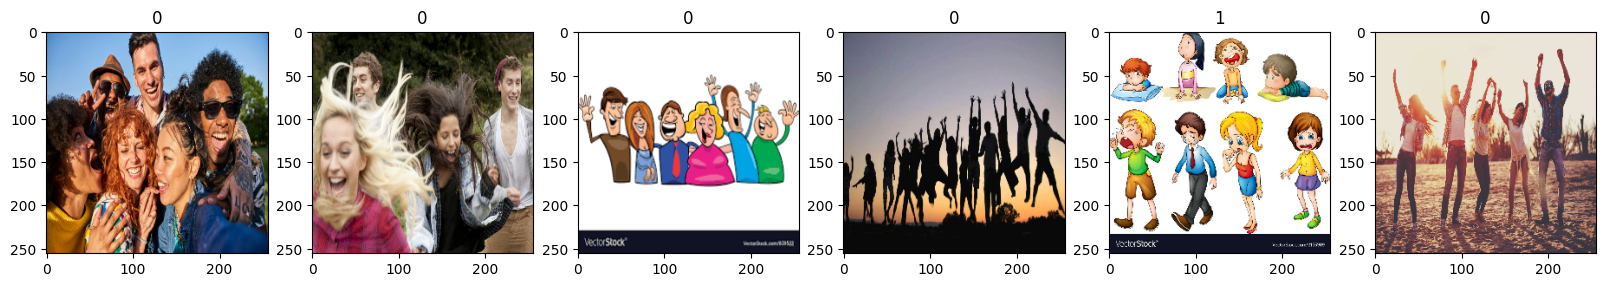

In [122]:
fig, ax = plt.subplots(ncols=6, figsize=(20,20))
for idx, img in enumerate(batch[0][:6]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
# pre preocess data, scaling images between 0 and 1 instead of 0 and 255

In [62]:
# scaled = batch[0]/255

In [64]:
# scaled.min()

0.0

In [123]:
# scale data
# map transform in pipeline
# x - images, y - labels
# transform x no transform on y

scaled_data = data.map(lambda x,y: (x/255, y))

In [124]:
scaled_iterator = scaled_data.as_numpy_iterator()

In [125]:
scaled_batch = scaled_iterator.next()

In [126]:
scaled_batch[0].min()

0.0

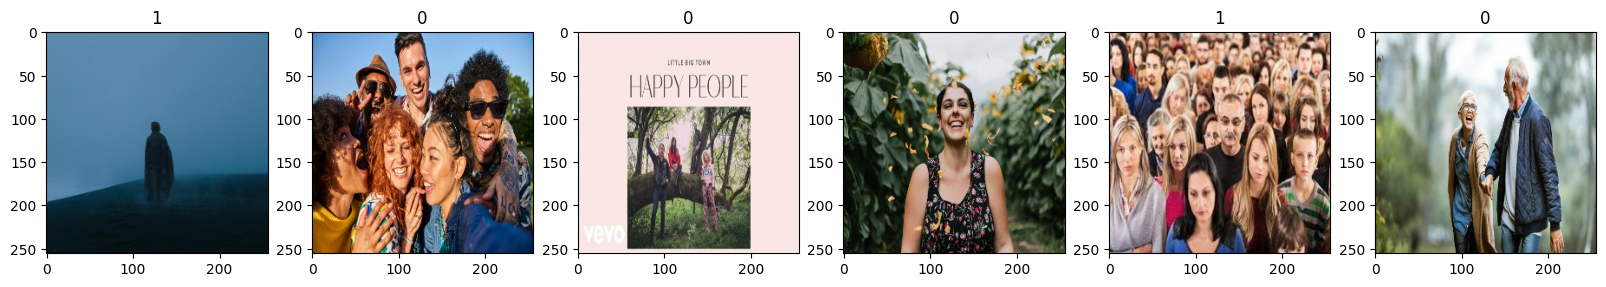

In [127]:
fig, ax = plt.subplots(ncols=6, figsize=(20,20))
for idx, img in enumerate(scaled_batch[0][:6]):
  ax[idx].imshow(img.astype(float))
  ax[idx].title.set_text(scaled_batch[1][idx])

In [128]:
len(scaled_data)

6

In [129]:
# split data
# during trainng
train_size = int(len(scaled_data) * 0.6)
val_size = int(len(scaled_data) * 0.2) + 1
# post training
test_size = int(len(scaled_data) * 0.1) + 1

In [98]:
train_size + val_size + test_size

6

In [130]:
train = scaled_data.take(train_size)
val = scaled_data.skip(train_size).take(val_size)

test = scaled_data.take(train_size + val_size).take(test_size)

In [131]:
len(val)

2

In [ ]:
# Deep Model

In [ ]:
# build deep neuralnetwork
# train model
# plot performance

In [134]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [135]:
model = Sequential()

In [137]:
# conv layer and max pool
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D()) # max value in (2,2) space, condensing by half

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten()) # condense to single dimention

#fully connected layers
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # 0 or 1 value whoch maps to happy or sad

In [151]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [152]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)       

In [ ]:
# train model with scaled data


In [148]:
logdir = '/content/drive/MyDrive/DeepImageClassification/ImageClassification-main/logs'

In [149]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [153]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 19s 7s/step - loss: 1.0781 - accuracy: 0.6146 - val_loss: 0.6887 - val_accuracy: 0.5469
Epoch 2/20
3/3 [==============================] - 15s 5s/step - loss: 0.7367 - accuracy: 0.4583 - val_loss: 0.6843 - val_accuracy: 0.4688
Epoch 3/20
3/3 [==============================] - 15s 5s/step - loss: 0.6478 - accuracy: 0.6042 - val_loss: 0.7327 - val_accuracy: 0.5312
Epoch 4/20
3/3 [==============================] - 13s 4s/step - loss: 0.6670 - accuracy: 0.6250 - val_loss: 0.6418 - val_accuracy: 0.6875
Epoch 5/20
3/3 [==============================] - 14s 4s/step - loss: 0.5946 - accuracy: 0.7083 - val_loss: 0.6016 - val_accuracy: 0.6094
Epoch 6/20
3/3 [==============================] - 17s 7s/step - loss: 0.5685 - accuracy: 0.6042 - val_loss: 0.4951 - val_accuracy: 0.7812
Epoch 7/20
3/3 [==============================] - 17s 5s/step - loss: 0.5433 - accuracy: 0.7500 - val_loss: 0.4744 - val_accuracy: 0.8594
Epoch 8/20
3/3 [==================

In [155]:
# plot performance

hist.history

{'loss': [1.078076720237732,
  0.7367417812347412,
  0.6477508544921875,
  0.6670109629631042,
  0.5945640206336975,
  0.5685322284698486,
  0.5433271527290344,
  0.45312929153442383,
  0.41765546798706055,
  0.32534059882164,
  0.2511245906352997,
  0.2408187836408615,
  0.17219781875610352,
  0.2676883935928345,
  0.2911122739315033,
  0.16537870466709137,
  0.14326904714107513,
  0.1676841527223587,
  0.13589024543762207,
  0.09830062836408615],
 'accuracy': [0.6145833134651184,
  0.4583333432674408,
  0.6041666865348816,
  0.625,
  0.7083333134651184,
  0.6041666865348816,
  0.75,
  0.8333333134651184,
  0.7916666865348816,
  0.8854166865348816,
  0.9479166865348816,
  0.9479166865348816,
  0.9375,
  0.8958333134651184,
  0.875,
  0.9479166865348816,
  0.96875,
  0.9375,
  0.9583333134651184,
  0.9791666865348816],
 'val_loss': [0.6887499094009399,
  0.6843489408493042,
  0.7327370643615723,
  0.6417843699455261,
  0.6015802025794983,
  0.4951328635215759,
  0.47441792488098145,
  

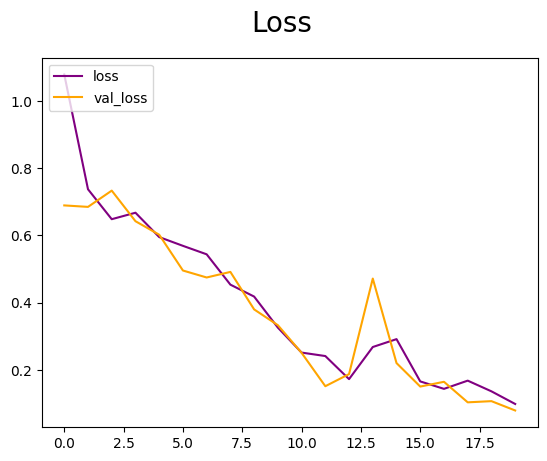

In [160]:
fig = plt.figure()

plt.plot(hist.history['loss'], color='purple', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')

fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')

plt.show()

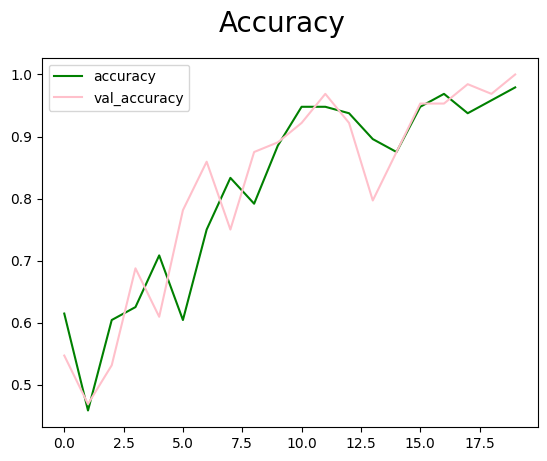

In [159]:
fig = plt.figure()

plt.plot(hist.history['accuracy'], color='green', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='pink', label='val_accuracy')

fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')

plt.show()
# it is interesitng that its not jut the inverse of the loss plot

In [ ]:
# evaluate the performance on the testing data

In [161]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [162]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [163]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 [==============================] - 1s 556ms/step


In [164]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')
# all high so good performance

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


In [ ]:
# test the data from extrernal images

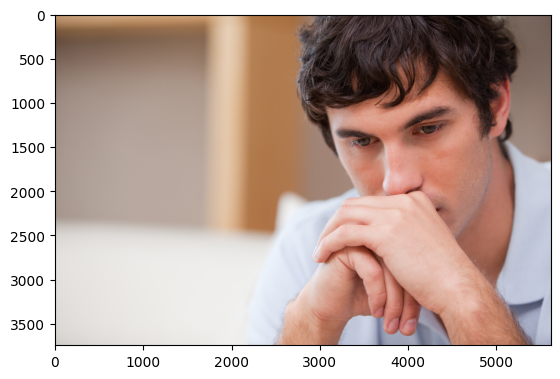

In [168]:
img = cv2.imread('/content/drive/MyDrive/DeepImageClassification/ImageClassification-main/8iAb9k4aT.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

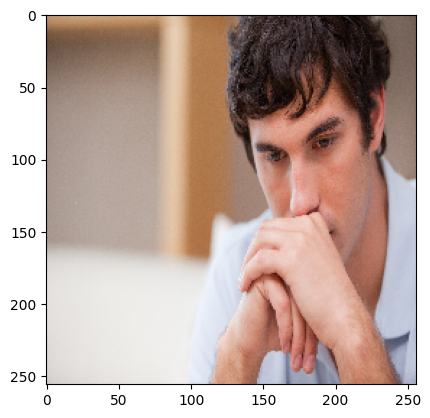

In [177]:
# need to remodel for our model
resize =cv2.resize(img, (256,256))
rgb_img = cv2.cvtColor(resize, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_img)
plt.show()

In [182]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [181]:
resize.shape

(256, 256, 3)

In [183]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 97ms/step


In [184]:
yhat

array([[0.8826541]], dtype=float32)

In [185]:
if yhat > 0.5:
  print(f'Predicted class is sad')
else:
  print(f'Predicted class is happy')

predicted class is sad


In [ ]:
# save model to be deployed or used for later

In [187]:
from tensorflow.keras.models import load_model

In [189]:
model.save(os.path.join('/content/drive/MyDrive/DeepImageClassification/ImageClassification-main/models', 'HappySadModedl.h5')) #h5 is a serialisation format

In [190]:
new_model = load_model(os.path.join('/content/drive/MyDrive/DeepImageClassification/ImageClassification-main/models', 'HappySadModedl.h5'))

In [191]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 158ms/step


In [192]:
yhatnew

array([[0.8826541]], dtype=float32)

In [193]:
if yhatnew > 0.5:
  print(f'Predicted class is sad')
else:
  print(f'Predicted class is happy')

Predicted class is sad
